In [236]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy 
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf


from scipy.stats import bartlett
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [196]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )

In [166]:
df = pd.read_csv('cars.csv')

In [167]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [168]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [169]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [170]:
df.shape

(205, 26)

In [157]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [171]:
df['CarName'] = df['CarName'].apply(lambda x: x.split(' '))

In [172]:
for i in range(df.shape[0]):
    df['CarName'][i] = df['CarName'][i][0]

<ipython-input-172-c01cf1da29b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CarName'][i] = df['CarName'][i][0]


In [173]:
df['CarName'].nunique()

28

In [174]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [175]:
# Заменим неправильные названия компаний

In [176]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 
                      'porcshce':'porsche', 'toyouta': 'toyota',
                      'vokswagen':'volkswagen', 'vw' : 'volkswagen'
                    
                      
                       })

In [177]:
#Число уникальных данных

In [178]:
df['CarName'].nunique()

22

In [182]:
columns = ['company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 
           'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']

In [180]:
df = df.rename(columns={'CarName':'company'})

In [206]:
df = df[columns]

In [207]:
df_correlation = df.corr().round(2)

In [208]:
df_correlation

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.00,0.87,0.80,0.78,0.57,0.49,0.35,0.58
carlength,0.87,1.00,0.84,0.88,0.68,0.61,0.55,0.68
carwidth,0.80,0.84,1.00,0.87,0.74,0.56,0.64,0.76
curbweight,0.78,0.88,0.87,1.00,0.85,0.65,0.75,0.84
enginesize,0.57,0.68,0.74,0.85,1.00,0.58,0.81,0.87
boreratio,0.49,0.61,0.56,0.65,0.58,1.00,0.57,0.55
horsepower,0.35,0.55,0.64,0.75,0.81,0.57,1.00,0.81
price,0.58,0.68,0.76,0.84,0.87,0.55,0.81,1.00


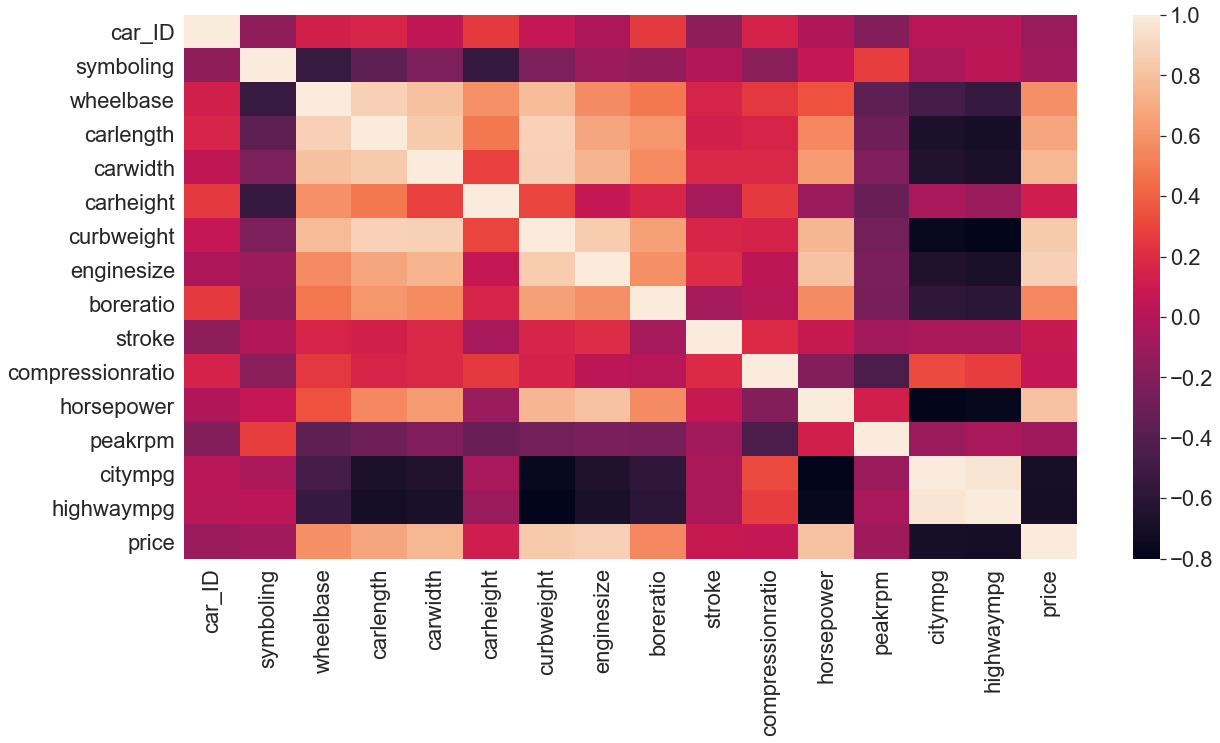

In [201]:
sns.heatmap(df_correlation)
None

In [204]:
# Преобразуем категориальные признаки (слова) в категориальные числа с помощью one-hot codding 

In [225]:
df_dummy = pd.get_dummies(data=df[['company', 'fueltype', 'aspiration', 'carbody',
                                    'drivewheel', 'enginetype', 'cylindernumber']], 
                          drop_first = True)        

In [228]:
columns

['company',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'horsepower',
 'price']

In [226]:
df.dtypes

company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
dtype: object

In [227]:
df_dummy

,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [229]:
df_dummy = pd.concat([df_dummy, df[['carlength','carwidth','curbweight',
                                    'enginesize','boreratio',
                                     'horsepower',
                                     'price']]], axis=1)

In [230]:
df_dummy

,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,168.8,64.1,2548,130,3.47,111,13495.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,168.8,64.1,2548,130,3.47,111,16500.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,171.2,65.5,2823,152,2.68,154,16500.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,176.6,66.2,2337,109,3.19,102,13950.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,176.6,66.4,2824,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,188.8,68.9,2952,141,3.78,114,16845.0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,188.8,68.8,3049,141,3.78,160,19045.0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,188.8,68.9,3012,173,3.58,134,21485.0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,188.8,68.9,3217,145,3.01,106,22470.0


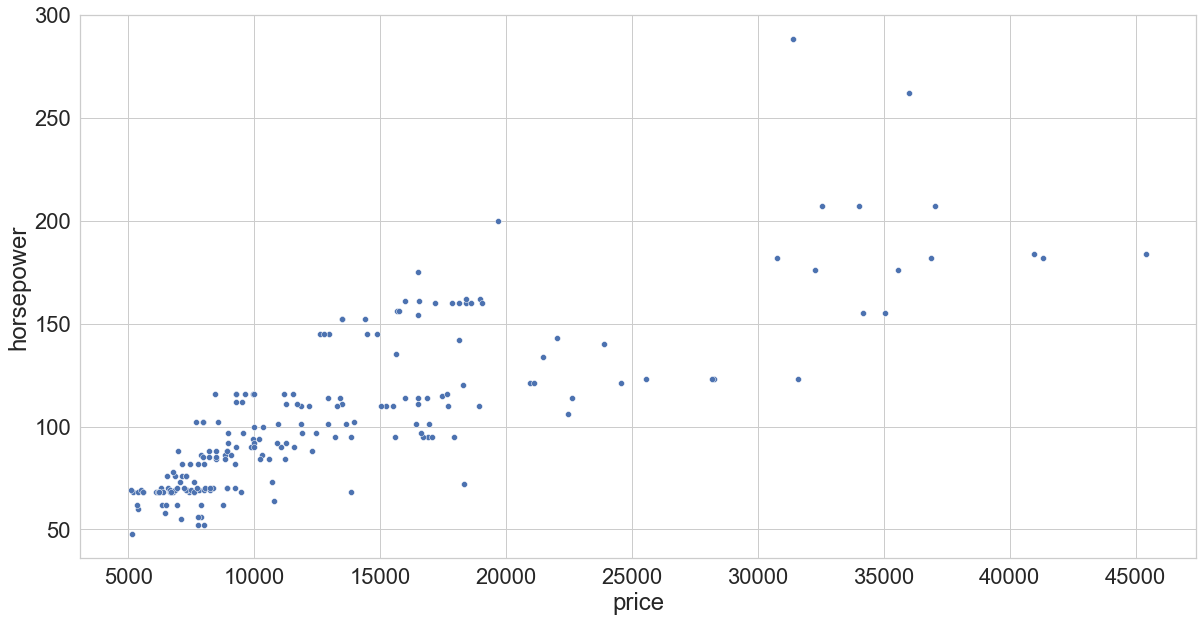

In [232]:
sns.scatterplot(x=df_dummy['price'], y=df_dummy['horsepower'])
None

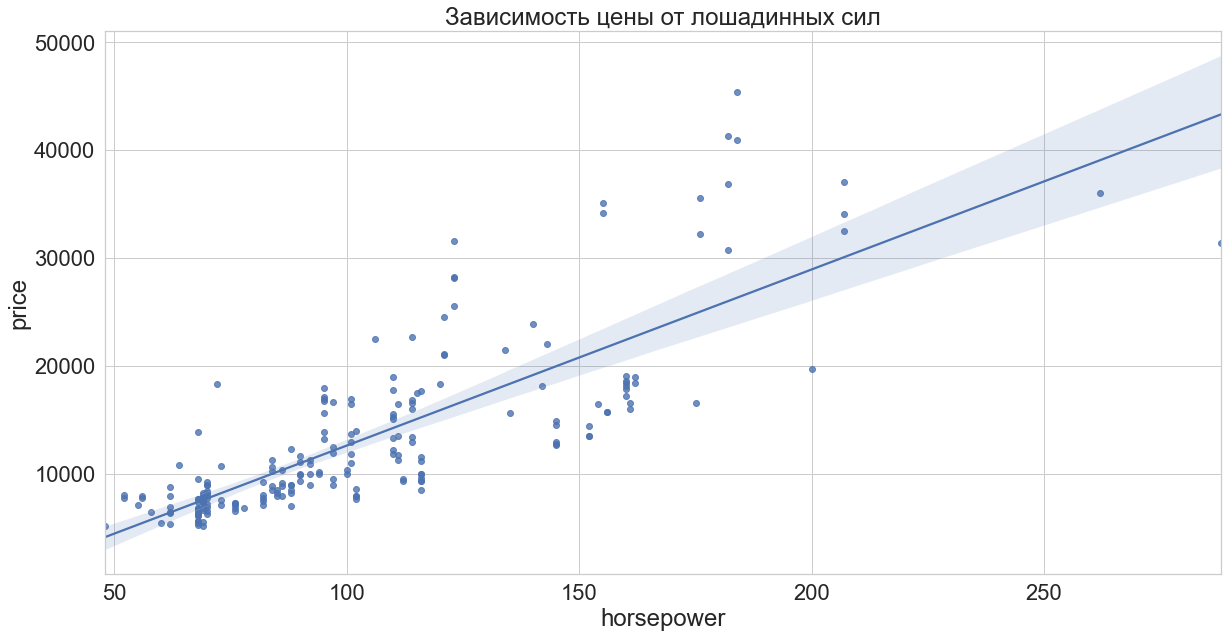

In [234]:

sns.regplot(x = 'horsepower', y = 'price', data = df_dummy)
plt.title('Зависимость цены от лошадинных сил')
plt.xlabel('horsepower')
plt.ylabel('price')
None

In [255]:
results = smf.ols('price ~ horsepower', data=df_dummy).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.48e-48
Time:                        19:12:17   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [239]:
df_dummy.columns

Index(['company_audi', 'company_bmw', 'company_buick', 'company_chevrolet',
       'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar',
       'company_mazda', 'company_mercury', 'company_mitsubishi',
       'company_nissan', 'company_peugeot', 'company_plymouth',
       'company_porsche', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price'],
      dtype='object')

In [ ]:
df_dummy[]

In [241]:
results = smf.ols('price ~ fueltype_gas + aspiration_turbo + carbody_hardtop + carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd + enginetype_dohcv + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + enginetype_rotor +  cylindernumber_five + cylindernumber_four  + cylindernumber_six + cylindernumber_three + cylindernumber_twelve +  cylindernumber_two +  carlength +  carwidth + curbweight +  enginesize + boreratio + horsepower', data=df_dummy).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     75.33
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.56e-81
Time:                        19:03:01   Log-Likelihood:                -1881.9
No. Observations:                 205   AIC:                             3816.
Df Residuals:                     179   BIC:                             3902.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.683e+

In [ ]:
results = smf.ols('price ~ company_audi +  company_bmw + company_buick +  company_chevrolet + company_dodge +  company_honda', 'company_isuzu', 'company_jaguar','company_mazda', 'company_mercury', 'company_mitsubishi','company_nissan', 'company_peugeot', 'company_plymouth','company_porsche', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo' fueltype_gas + aspiration_turbo + carbody_hardtop + carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd + enginetype_dohcv + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + enginetype_rotor +  cylindernumber_five + cylindernumber_four  + cylindernumber_six + cylindernumber_three + cylindernumber_twelve +  cylindernumber_two +  carlength +  carwidth + curbweight +  enginesize + boreratio + horsepower', data=df_dummy).fit()

                  
                  
print(results.summary())


In [242]:
string = 'company_audi + company_bmw + company_buick + company_chevrolet + company_dodge + company_honda + company_isuzu + company_jaguar + company_mazda + company_mercury + company_mitsubishi + company_nissan + company_peugeot + company_plymouth + company_porsche + company_renault + company_saab + company_subaru + company_toyota  + company_volkswagen + company_volvo'

In [244]:
results = smf.ols('price ~  company_audi + company_bmw + company_buick + company_chevrolet + company_dodge + company_honda + company_isuzu + company_jaguar + company_mazda + company_mercury + company_mitsubishi + company_nissan + company_peugeot + company_plymouth + company_porsche + company_renault + company_saab + company_subaru + company_toyota  + company_volkswagen + company_volvo + fueltype_gas + aspiration_turbo + carbody_hardtop + carbody_hatchback + carbody_sedan + carbody_wagon + drivewheel_fwd + drivewheel_rwd + enginetype_dohcv + enginetype_l + enginetype_ohc + enginetype_ohcf + enginetype_ohcv + enginetype_rotor +  cylindernumber_five + cylindernumber_four  + cylindernumber_six + cylindernumber_three + cylindernumber_twelve +  cylindernumber_two +  carlength +  carwidth + curbweight +  enginesize + boreratio + horsepower', data=df_dummy).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     81.41
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           3.30e-89
Time:                        19:07:48   Log-Likelihood:                -1806.5
No. Observations:                 205   AIC:                             3705.
Df Residuals:                     159   BIC:                             3858.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.364e+

In [249]:
df_dummy.shape

(205, 48)